In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [18]:
df = pd.read_csv('ADANIGREEN.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-06-18,30.000000,31.500000,28.500000,31.500000,31.500000,7006229
1,2018-06-19,32.700001,33.049999,31.000000,32.599998,32.599998,2895692
2,2018-06-20,31.500000,32.200001,31.000000,31.000000,31.000000,1115553
3,2018-06-21,29.450001,30.000000,29.450001,29.650000,29.650000,2854524
4,2018-06-22,28.200001,29.799999,28.200001,29.450001,29.450001,1612972
...,...,...,...,...,...,...,...
1117,2022-12-26,1809.050049,1910.699951,1755.000000,1876.849976,1876.849976,1226600
1118,2022-12-27,1890.000000,1929.949951,1883.250000,1908.699951,1908.699951,899439
1119,2022-12-28,1908.699951,1943.000000,1877.000000,1897.849976,1897.849976,997622
1120,2022-12-29,1891.000000,1938.000000,1865.000000,1910.250000,1910.250000,779002


In [19]:
df.drop('Adj Close',axis=1,inplace=True)

In [20]:
df.isnull().sum()
df.isna().any()

Date      False
Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

<Axes: >

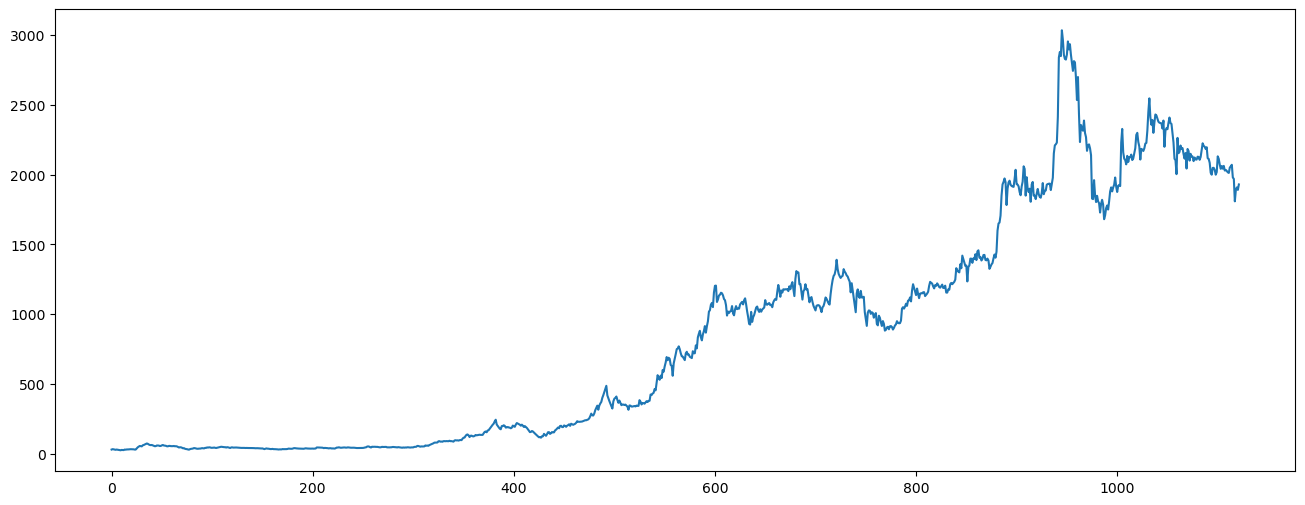

In [21]:
df['Open'].plot(figsize=(16,6))

In [22]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date_ordinal'] = df['Date'].apply(lambda x: x.toordinal())
X = df[['Date_ordinal']]
y = df['Close']


In [23]:
degree = 3  # Degree of the polynomial features
poly_features = PolynomialFeatures(degree=degree)
X_poly = poly_features.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)


In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [26]:
y_pred = model.predict(X_test)

In [27]:
next_month_dates_ordinal = np.array([df['Date'].max() + pd.Timedelta(days=i) for i in range(1, 31)]).astype('datetime64[D]').astype(int) + 719163
next_month_dates_poly = poly_features.transform(next_month_dates_ordinal.reshape(-1, 1))
next_month_pred = model.predict(next_month_dates_poly)


C:\Users\rishu\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


In [28]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 45318.712088184206


In [29]:
X_test_dates = [datetime.fromordinal(int(date)) for date in X_test[:, 1]]
next_month_dates = [datetime.fromordinal(date) for date in next_month_dates_ordinal]

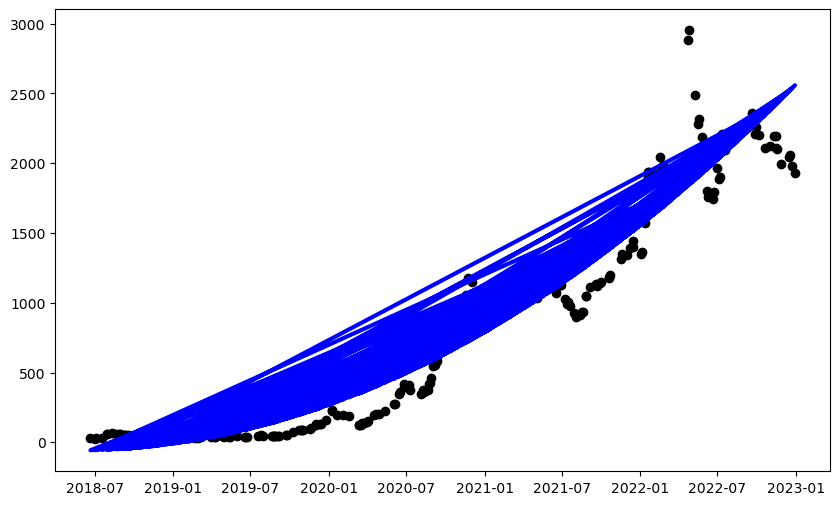

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test_dates, y_test, color='black', label='Actual data')
plt.plot(X_test_dates, y_pred, color='blue', linewidth=3, label='Polynomial regression line')

In [31]:
# Create a DataFrame for the next month's predictions
next_month_df = pd.DataFrame({
    'Date': next_month_dates,
    'Predicted_Close': next_month_pred
})

# Display the DataFrame
print(next_month_df)

         Date  Predicted_Close
0  2022-12-31      2561.083015
1  2023-01-01      2564.181662
2  2023-01-02      2567.282144
3  2023-01-03      2570.384460
4  2023-01-04      2573.488610
5  2023-01-05      2576.594595
6  2023-01-06      2579.702413
7  2023-01-07      2582.812066
8  2023-01-08      2585.923554
9  2023-01-09      2589.036875
10 2023-01-10      2592.152031
11 2023-01-11      2595.269021
12 2023-01-12      2598.387845
13 2023-01-13      2601.508503
14 2023-01-14      2604.630996
15 2023-01-15      2607.755323
16 2023-01-16      2610.881484
17 2023-01-17      2614.009480
18 2023-01-18      2617.139310
19 2023-01-19      2620.270974
20 2023-01-20      2623.404473
21 2023-01-21      2626.539805
22 2023-01-22      2629.676972
23 2023-01-23      2632.815974
24 2023-01-24      2635.956810
25 2023-01-25      2639.099480
26 2023-01-26      2642.243984
27 2023-01-27      2645.390323
28 2023-01-28      2648.538496
29 2023-01-29      2651.688503
